# Nyquist diagram of a second-order system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Second-order open-loop transfer function
class secondOrder:
    # Constructor
    def __init__(self, omega_n, zeta):
        self.__omega_n = omega_n
        self.__zeta = zeta
    
    # Apply calculation
    def apply(self, s):
        return self.__omega_n**2 / (s * (s + 2 * self.__zeta * self.__omega_n))
    
    # Natural angular frequency
    def get_omega_n(self):
        return self.__omega_n
    
    # Damping factor
    def get_zeta(self):
        return self.__zeta

    # Free-oscillation angular frequency
    def get_omega_0(self):
        return self.__omega_n * np.sqrt(1 - self.__zeta**2)
    
    # Resonant angular frequency
    def get_omega_r(self):
        return self.__omega_n * np.sqrt(1 - 2 * self.__zeta**2)
    
    # Gain cross-over angular frequency
    def get_omega_gc(self):
        return self.__omega_n * np.sqrt(np.sqrt(1 + 4 * self.__zeta**4) - 2 * self.__zeta**2)
    
    # Impulse response
    def get_impulse_response(self, t):
        return self.__omega_n * np.exp(-self.__zeta * self.__omega_n * t) * (np.sin(self.get_omega_0() * t))

In [3]:
# Define system
G = secondOrder(1, 0.3)

In [4]:
# Calculate frequency response
omega = np.logspace(-2, 3, 100)
resp = G.apply(1j * omega)
resp_inv = G.apply(-1j * omega)

In [5]:
# Calculate impulse response
t = np.arange(0, 20, 0.01)
imp = G.get_impulse_response(t)

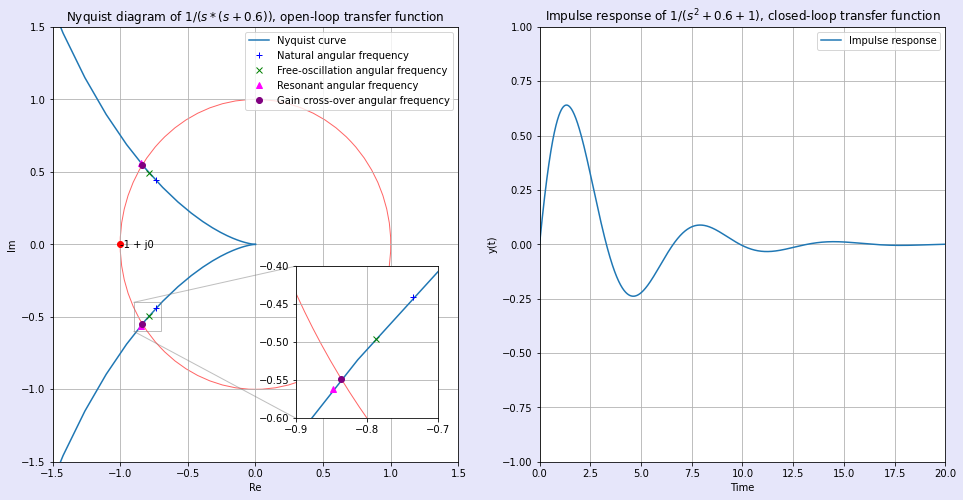

In [6]:
# Plot Nyquist diagram
# Setting
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
fig.patch.set_facecolor('lavender')
cmap = plt.get_cmap("tab10")

# Plot positive and negative frequency diagrams
ax[0].set_title(rf'Nyquist diagram of ${G.get_omega_n()**2} / (s * (s + {2 * G.get_zeta() * G.get_omega_n()}))$, open-loop transfer function')
ax[0].plot(np.real(resp), np.imag(resp), color = cmap(0), label = 'Nyquist curve')
ax[0].plot(np.real(resp_inv), np.imag(resp_inv), color = cmap(0))

# Show (-1, 0)
ax[0].plot([-1], [0], color = 'red', marker = 'o')
ax[0].text(-1, 0, '-1 + j0', va = 'center')

# Show natural angular frequency
ax[0].plot([np.real(G.apply(1j * G.get_omega_n()))], [np.imag(G.apply(1j * G.get_omega_n()))], color = 'blue', ls = 'None', marker = '+', label = 'Natural angular frequency')
ax[0].plot([np.real(G.apply(- 1j * G.get_omega_n()))], [np.imag(G.apply(- 1j * G.get_omega_n()))], color = 'blue', ls = 'None', marker = '+')

# Show free-oscillation angular frequency
ax[0].plot([np.real(G.apply(1j * G.get_omega_0()))], [np.imag(G.apply(1j * G.get_omega_0()))], color = 'green', ls = 'None', marker = 'x', label = 'Free-oscillation angular frequency')
ax[0].plot([np.real(G.apply(- 1j * G.get_omega_0()))], [np.imag(G.apply(- 1j * G.get_omega_0()))], color = 'green', ls = 'None', marker = 'x')

# Show Resonant angular frequency
ax[0].plot([np.real(G.apply(1j * G.get_omega_r()))], [np.imag(G.apply(1j * G.get_omega_r()))], color = 'magenta', ls = 'None', marker = '^', label = 'Resonant angular frequency')
ax[0].plot([np.real(G.apply(- 1j * G.get_omega_r()))], [np.imag(G.apply(- 1j * G.get_omega_r()))], color = 'magenta', ls = 'None', marker = '^')

# Show gain cross-over angular frequency
ax[0].plot([np.real(G.apply(1j * G.get_omega_gc()))], [np.imag(G.apply(1j * G.get_omega_gc()))], color = 'purple',ls = 'None',  marker = 'o', label = 'Gain cross-over angular frequency')
ax[0].plot([np.real(G.apply(- 1j * G.get_omega_gc()))], [np.imag(G.apply(- 1j * G.get_omega_gc()))], color = 'purple', ls = 'None', marker = 'o')

# Unit circle
c = patches.Circle(xy = (0, 0), radius = 1, ec = 'red', fill = False, alpha = 0.6)
ax[0].add_patch(c)

# Set axes
ax[0].set_xlim(-1.5, 1.5)
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('Re')
ax[0].set_ylabel('Im')

# Set legend and grid
ax[0].legend(loc = 'upper right')
ax[0].grid()

## Zoomed
axins = ax[0].inset_axes([0.6, 0.1, 0.35, 0.35])
axins.set_xlim(-0.9, -0.7)
axins.set_ylim(-0.6, -0.4)

# Plot positive and negative frequency diagrams, zoomed
axins.plot(np.real(resp), np.imag(resp), color = cmap(0), label = 'Nyquist curve')
axins.plot(np.real(resp_inv), np.imag(resp_inv), color = cmap(0))

# Show natural angular frequency, zoomed
axins.plot([np.real(G.apply(1j * G.get_omega_n()))], [np.imag(G.apply(1j * G.get_omega_n()))], color = 'blue', ls = 'None', marker = '+', label = 'Natural angular frequency')

# Show free-oscillation angular frequency, zoomed
axins.plot([np.real(G.apply(1j * G.get_omega_0()))], [np.imag(G.apply(1j * G.get_omega_0()))], color = 'green', ls = 'None', marker = 'x', label = 'Free-oscillation angular frequency')

# Show Resonant angular frequency, zoomed
axins.plot([np.real(G.apply(1j * G.get_omega_r()))], [np.imag(G.apply(1j * G.get_omega_r()))], color = 'magenta', ls = 'None', marker = '^', label = 'Resonant angular frequency')

# Show gain cross-over angular frequency, zoomed
axins.plot([np.real(G.apply(1j * G.get_omega_gc()))], [np.imag(G.apply(1j * G.get_omega_gc()))], color = 'purple',ls = 'None',  marker = 'o', label = 'Gain cross-over angular frequency')

# Unit circle, zoomed
cz = patches.Circle(xy = (0, 0), radius = 1, ec = 'red', fill = False, alpha = 0.6)
axins.add_patch(cz)

# Show zoomed area
ax[0].indicate_inset_zoom(axins)

axins.grid()

# Impulse response
ax[1].set_title(rf'Impulse response of ${G.get_omega_n()**2} / (s^{2} + {2 * G.get_zeta() * G.get_omega_n()} + {G.get_omega_n()**2})$, closed-loop transfer function')
ax[1].plot(t, imp, label = 'Impulse response')

# Set axes
ax[1].set_xlim(0, 20)
ax[1].set_ylim(-1, 1)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('y(t)')

# Set legend and grid
ax[1].legend(loc = 'upper right')
ax[1].grid()